<a href="https://colab.research.google.com/github/AnjaneyaSBV/11239A079_AIML-DSE-_LAB/blob/main/AIML(DSE)LAB__11239a079_(Experiments%201%20to%208).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Data Exploration & Preprocessing

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, r2_score

# Creating datasets
teams = pd.DataFrame({
    'teams': ['csk', 'rcb', 'dc', 'gt', 'kkr'],
    'jersey_color': ['yellow', 'red', 'blue & red', 'navy blue', 'violet'],
    'no.of_cups': [5, 0, 0, 1, 2],
    'no.of_orange_caps': [4, 3, 0, 1, 2]
})

fruits = pd.DataFrame({
    'fruit': ['Cranberry', 'Lemon', 'Tamarind', 'Orange', 'Pineapple'],
    'color': ['Red', 'Yellow', 'Brown', 'Orange', 'Brown'],
    'weight_(g)': [2, 80, 16, 160, 900],
    'sweetness': [3, 3, 4, 6, 6]
})

# Simulating PIMA Indians Diabetes Dataset
from sklearn.datasets import load_diabetes
data = load_diabetes()
pima = pd.DataFrame(data.data, columns=data.feature_names)
pima['Outcome'] = np.random.choice([0, 1], size=pima.shape[0])

# Display heads
print(teams.head())
print(fruits.head())

# Info
print(teams.info())
print(fruits.info())


  teams jersey_color  no.of_cups  no.of_orange_caps
0   csk       yellow           5                  4
1   rcb          red           0                  3
2    dc   blue & red           0                  0
3    gt    navy blue           1                  1
4   kkr       violet           2                  2
       fruit   color  weight_(g)  sweetness
0  Cranberry     Red           2          3
1      Lemon  Yellow          80          3
2   Tamarind   Brown          16          4
3     Orange  Orange         160          6
4  Pineapple   Brown         900          6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   teams              5 non-null      object
 1   jersey_color       5 non-null      object
 2   no.of_cups         5 non-null      int64 
 3   no.of_orange_caps  5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 

## Step 2: Regularized Linear Regression (on Fruits)

In [ ]:

X = fruits[['weight_(g)']]
y = fruits['sweetness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

print("R² Score:", ridge.score(X_test, y_test))


R² Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Step 3: Naive Bayes Classifier (on Teams)

In [ ]:

teams['high_cup'] = teams['no.of_cups'] > 1
X = teams[['jersey_color']]
X = pd.get_dummies(X)
y = teams['high_cup']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Step 4: Regularized Logistic Regression (on Fruits)

In [ ]:
print(y.value_counts())


is_sweet
False    5
Name: count, dtype: int64


In [ ]:
# Example: Manually balance classes
fruits['is_sweet'] = fruits['sweetness'] >= 7
sweet = fruits[fruits['is_sweet']]

# Adjust threshold if no 'sweet' fruits to ensure both classes are present
if len(sweet) == 0:
    median_sweetness = fruits['sweetness'].median()
    fruits['is_sweet'] = fruits['sweetness'] >= median_sweetness # Use median for is_sweet

# Recalculate sweet and not_sweet with the potentially adjusted threshold
sweet = fruits[fruits['is_sweet']]
not_sweet = fruits[~fruits['is_sweet']].sample(n=len(sweet), random_state=42, replace=True)

balanced = pd.concat([sweet, not_sweet])

X = balanced[['weight_(g)']]
y = balanced['is_sweet'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.4, random_state=42)

# Check if y_train contains only one class after splitting
if len(np.unique(y_train)) < 2:
    # Adjust the threshold to ensure both classes are present in y_train
    median_sweetness = fruits['sweetness'].median()
    fruits['is_sweet'] = fruits['sweetness'] >= median_sweetness  # Re-apply median if necessary

    # Recalculate balanced, X, y, and split again
    sweet = fruits[fruits['is_sweet']]
    not_sweet = fruits[~fruits['is_sweet']].sample(n=len(sweet), random_state=42, replace=True)
    balanced = pd.concat([sweet, not_sweet])
    X = balanced[['weight_(g)']]
    y = balanced['is_sweet'].astype(int)
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.4, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Step 5: UCI Pima Indians Diabetes Summary Output

In [ ]:

print(pima.mean())
print(pima.median())
print(pima.mode().iloc[0])
print(pima.var())
print(pima.std())


age       -1.444295e-18
sex        2.543215e-18
bmi       -2.255925e-16
bp        -4.854086e-17
s1        -1.428596e-17
s2         3.898811e-17
s3        -6.028360e-18
s4        -1.788100e-17
s5         9.243486e-17
s6         1.351770e-17
Outcome    4.886878e-01
dtype: float64
age        0.005383
sex       -0.044642
bmi       -0.007284
bp        -0.005670
s1        -0.004321
s2        -0.003819
s3        -0.006584
s4        -0.002592
s5        -0.001947
s6        -0.001078
Outcome    0.000000
dtype: float64
age        0.016281
sex       -0.044642
bmi       -0.030996
bp        -0.040099
s1        -0.037344
s2        -0.001001
s3        -0.013948
s4        -0.039493
s5        -0.018114
s6         0.003064
Outcome    0.000000
Name: 0, dtype: float64
age        0.002268
sex        0.002268
bmi        0.002268
bp         0.002268
s1         0.002268
s2         0.002268
s3         0.002268
s4         0.002268
s5         0.002268
s6         0.002268
Outcome    0.250439
dtype: float64
age    

## Step 6: Visualizations

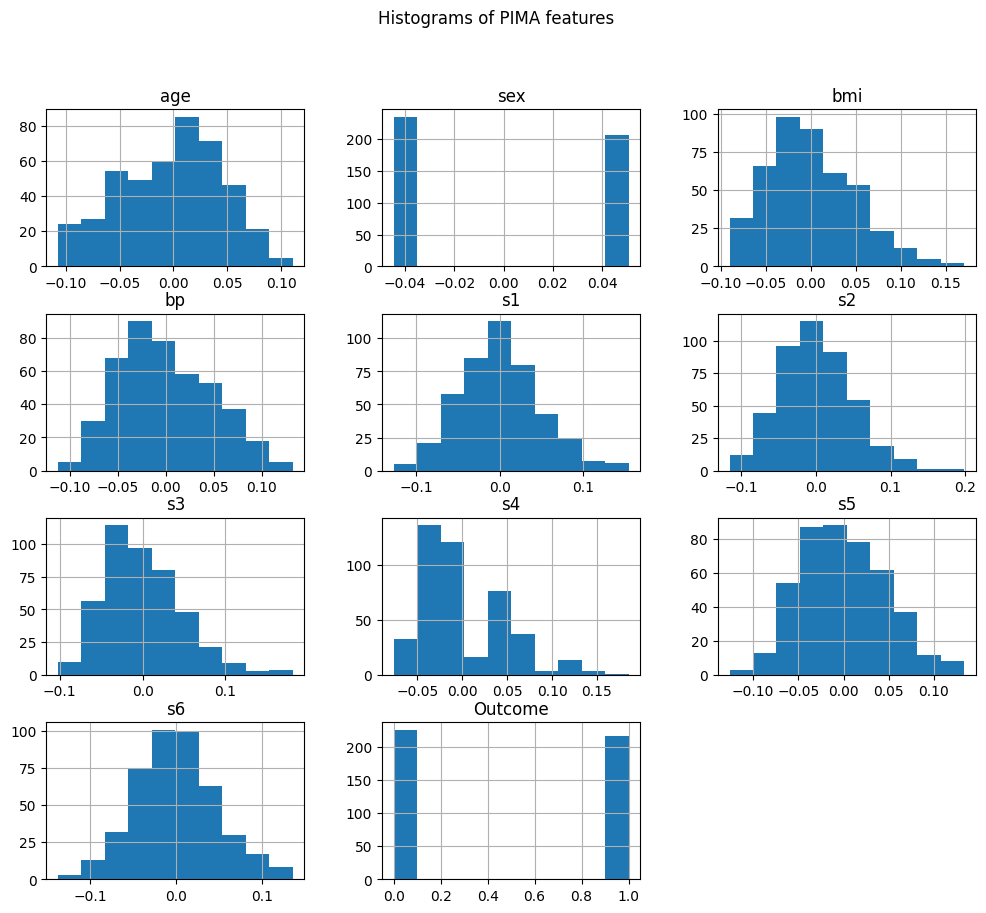

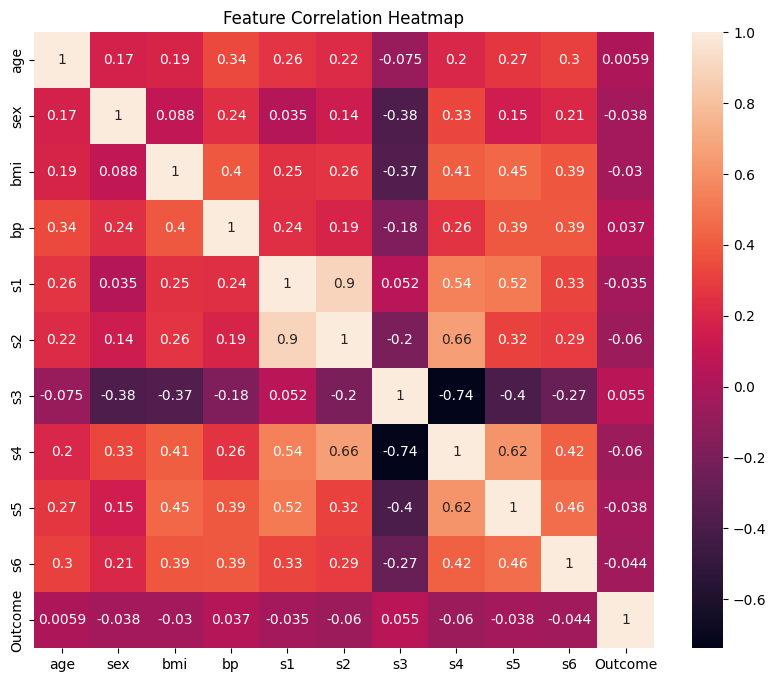

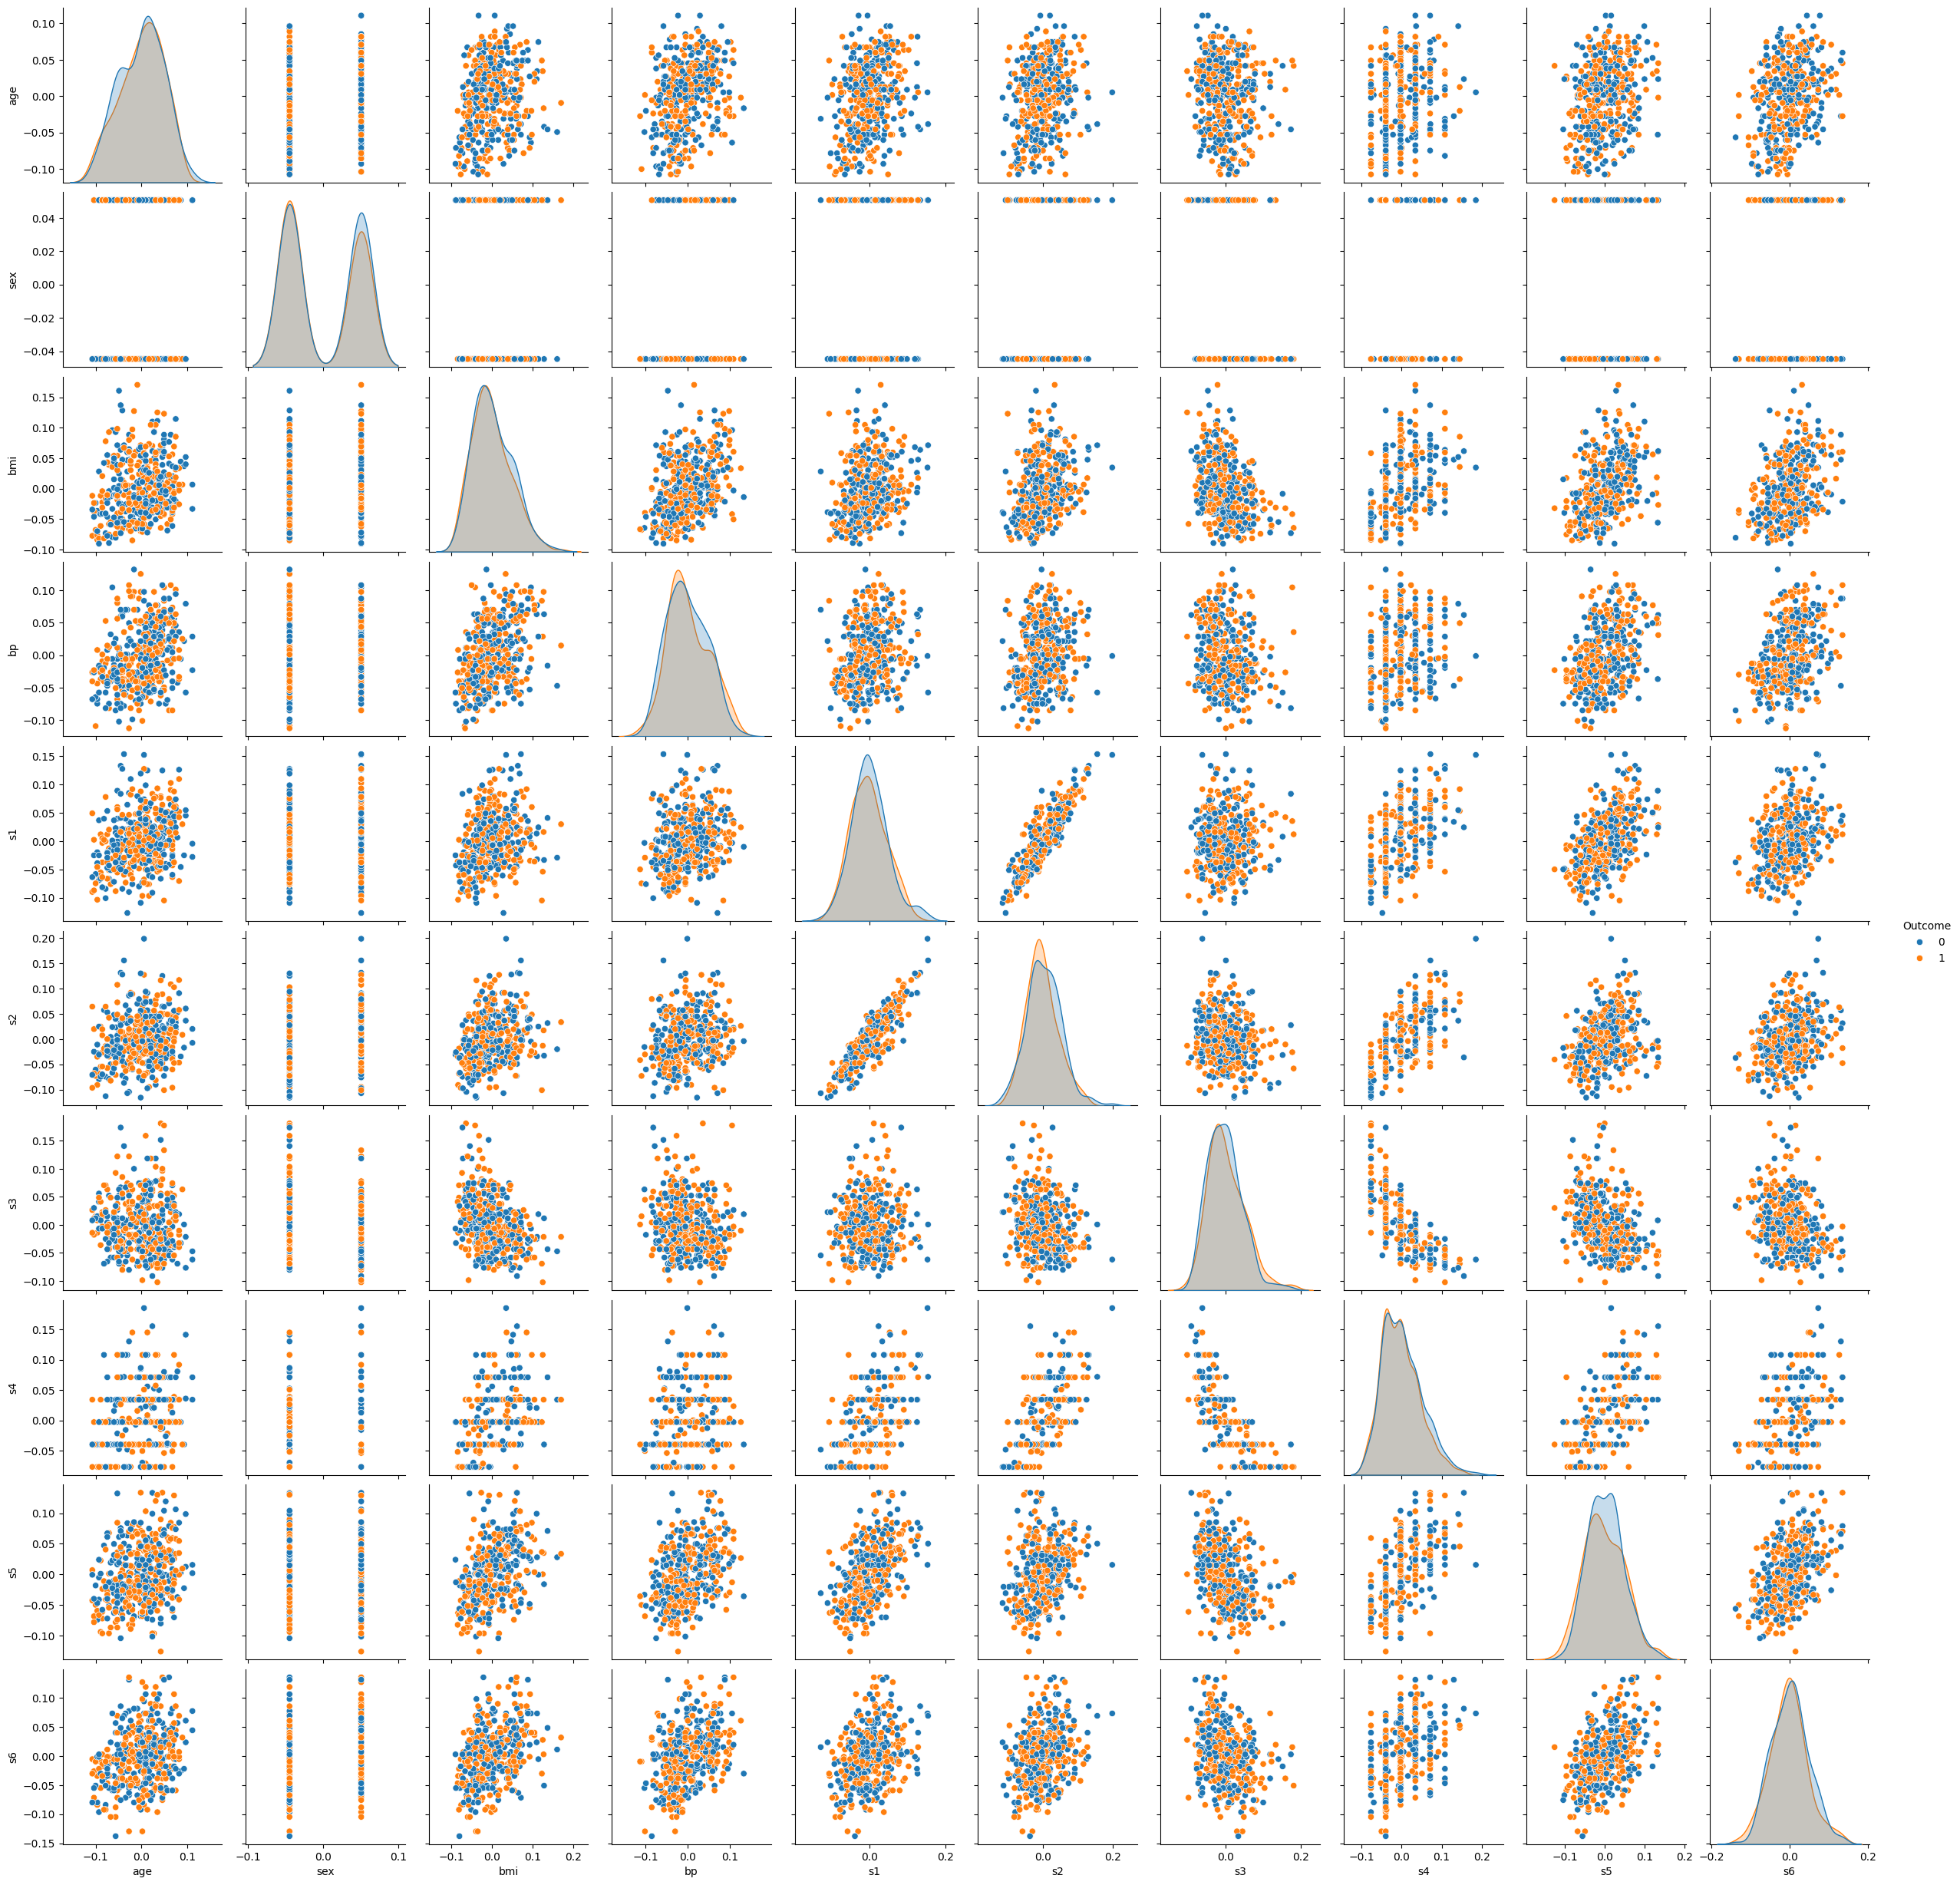

In [ ]:

# Histograms
pima.hist(figsize=(12,10))
plt.suptitle('Histograms of PIMA features')
plt.show()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(pima.corr(), annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot
sns.pairplot(pima, hue='Outcome')
plt.show()


## Step 7: Comparison: Linear vs Logistic Regression on PIMA

In [ ]:

# Logistic Regression
X = pima.drop('Outcome', axis=1)
y = pima['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("R² Score (Ridge Regression):", ridge.score(X_test, y_test))


              precision    recall  f1-score   support

           0       0.52      0.74      0.61        68
           1       0.50      0.28      0.36        65

    accuracy                           0.51       133
   macro avg       0.51      0.51      0.48       133
weighted avg       0.51      0.51      0.48       133

R² Score (Ridge Regression): -0.0024325024224434166


# **Step 8: Geographic Visualization**


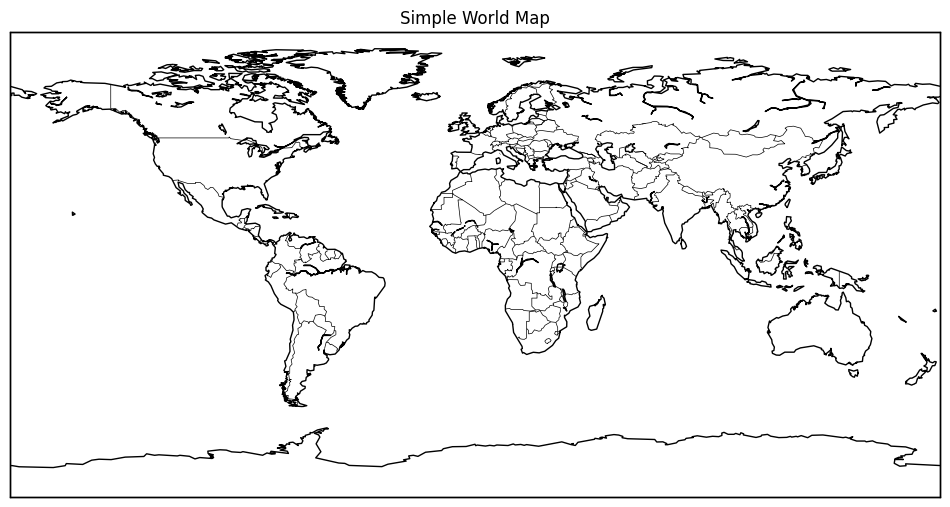

In [ ]:
!pip install basemap
#Import the library after installation:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
map = Basemap()
map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
plt.title('Simple World Map')
plt.show()